<a href="https://colab.research.google.com/github/Ayush260603/USA_Superstore_analysis/blob/main/ecommerce_sales_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 import numpy as np

In [ ]:
df=pd.read_excel("/content/Superstore_USA.xlsx")
df.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522


In [ ]:
df.shape

(9426, 24)

In [ ]:
df.isnull().sum() #tells no of missing values in each column

,0
Row ID,0
Order Priority,0
Discount,0
Unit Price,0
Shipping Cost,0
Customer ID,0
Customer Name,0
Ship Mode,0
Customer Segment,0
Product Category,0


Handling null values

In [ ]:
df['Product Base Margin'].isnull().sum()#tells no of missing value in product base margin column only

0

In [ ]:
# how to fill these missing values, as it is numerical column so fill them with mean
df['Product Base Margin'].fillna(df['Product Base Margin'].mean(),inplace=True)

<ipython-input-33-76c6555a32d7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product Base Margin'].fillna(df['Product Base Margin'].mean(),inplace=True)


In [ ]:
df['Product Base Margin']

,Product Base Margin
0,0.36
1,0.54
2,0.37
3,0.56
4,0.59
...,...
9421,0.40
9422,0.54
9423,0.71
9424,0.65


**UNIVARIATE DATA ANALYSIS**

**1. ORDER PRIORITY**

In [ ]:
#to do univariate analysis(one column analysis)eg order priority different value counts
df['Order Priority'].value_counts()

,count
Order Priority,
High,1970
Low,1926
Not Specified,1881
Medium,1844
Critical,1805


In [ ]:
df["Order Priority"].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

In [ ]:
df["Order Priority"]=df["Order Priority"].replace("Critical ","Critical")

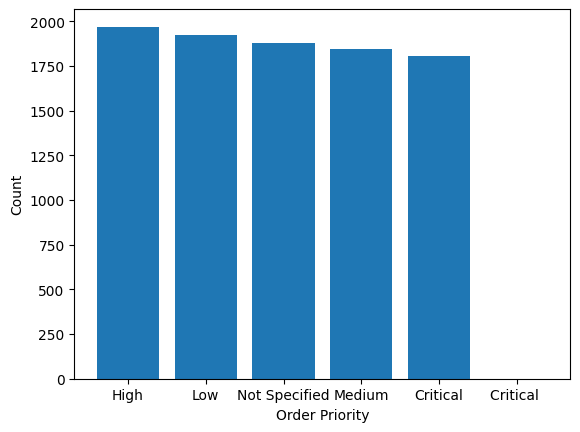

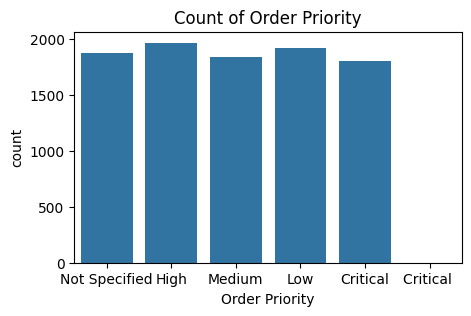

In [ ]:
#Visual Analysis of Order Priority
plt.xlabel("Order Priority")
plt.ylabel("Count")
plt.bar(df['Order Priority'].value_counts().index,df['Order Priority'].value_counts())
plt.figure(figsize=(5,3))
plt.title("Count of Order Priority")
sns.countplot(x="Order Priority", data=df)
plt.show()

**2. SHIP MODE ANALYSIS**


In [ ]:
df["Ship Mode"].value_counts()

,count
Ship Mode,
Regular Air,7036
Delivery Truck,1283
Express Air,1107


In [ ]:
x=df['Ship Mode'].value_counts().index
y=df['Ship Mode'].value_counts().values
print(x)

Index(['Regular Air', 'Delivery Truck', 'Express Air'], dtype='object', name='Ship Mode')


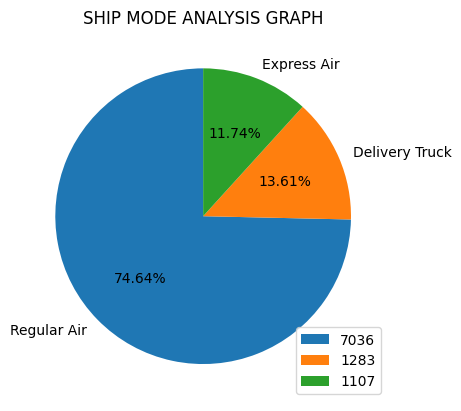

<Figure size 2000x1000 with 0 Axes>

In [ ]:
plt.title("SHIP MODE ANALYSIS GRAPH")
# sns.countplot(x="Ship Mode", data=df)
plt.pie(y,labels=x,autopct="%0.2f%%",startangle=90)
plt.legend(y,loc=4)

plt.figure(figsize=(20,10))
plt.show()

**BIVARIATE ANALYSIS**

1. **Product Category & Ship Mode**

Product Category
Office Supplies    5181
Technology         2312
Furniture          1933
Name: count, dtype: int64


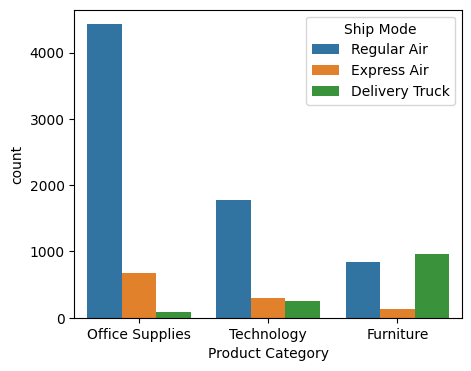

In [ ]:
print(df["Product Category"].value_counts())
plt.figure(figsize=(5,4))
sns.countplot(x="Product Category",data=df,hue="Ship Mode")
plt.show()

2. **Product Category & Product Subcategory**

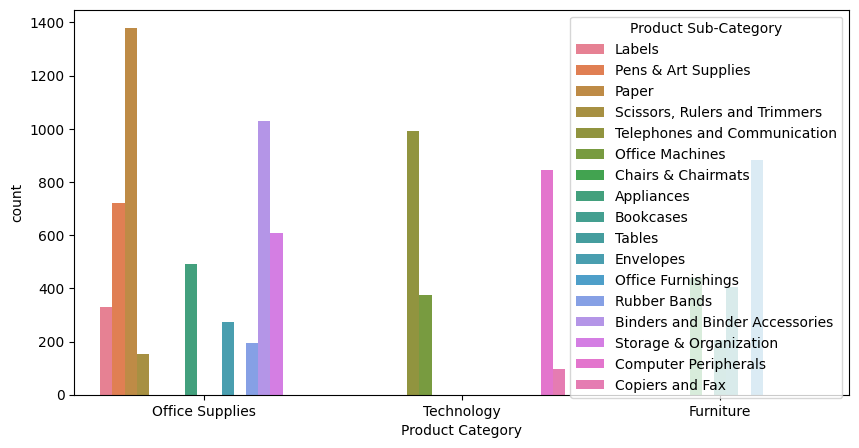

In [ ]:
 plt.figure(figsize=(10,5))
 sns.countplot(x="Product Category",data=df,hue="Product Sub-Category")
 plt.show()

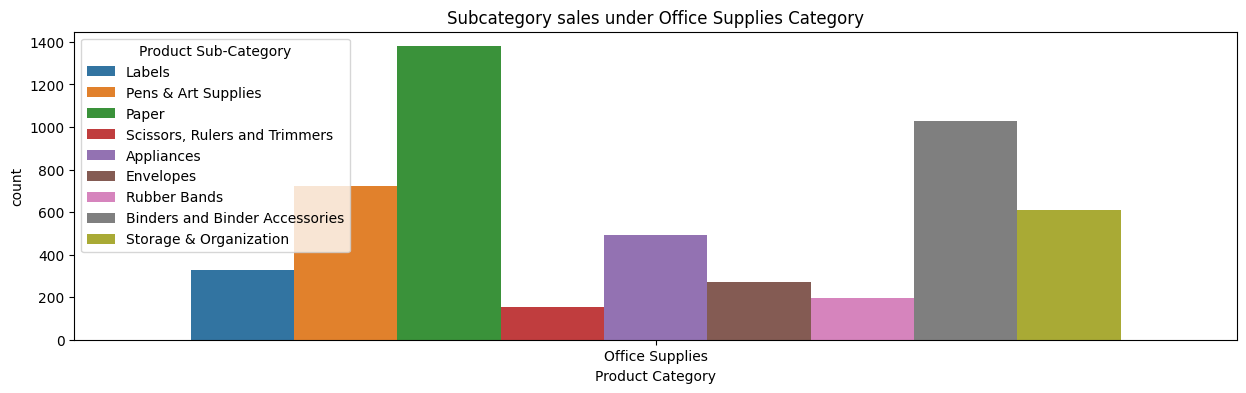

In [ ]:
#to decompose a big graph to small graph(doing visual analysis for just one product category as there are multiple subcategories)
plt.figure(figsize=(15,4))
plt.title("Subcategory sales under Office Supplies Category")
sns.countplot(x="Product Category",hue="Product Sub-Category",data=df[df["Product Category"]=="Office Supplies"])
plt.show()

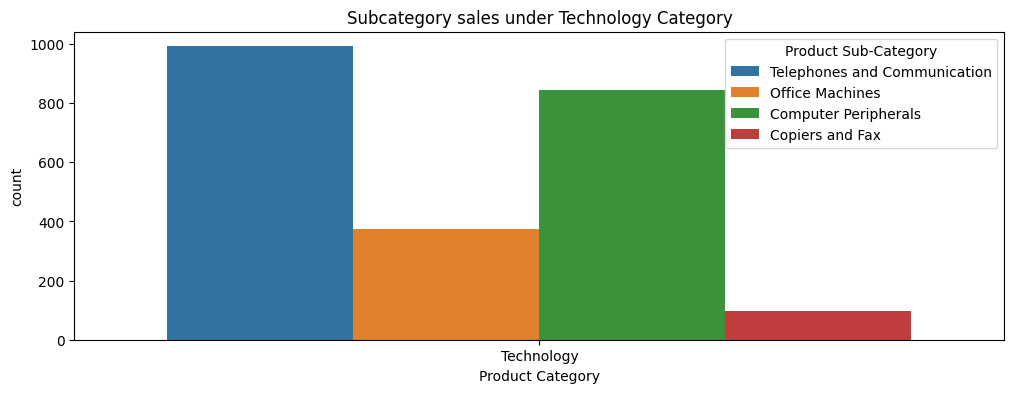

In [ ]:
#graph showing how many subcategories are sold under technology product category
plt.figure(figsize=(12,4))
plt.title("Subcategory sales under Technology Category")
sns.countplot(x="Product Category",hue="Product Sub-Category",data=df[df["Product Category"]=="Technology"])
plt.show()

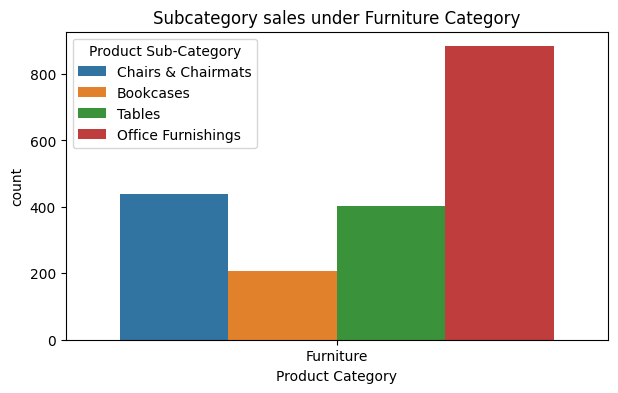

In [ ]:
#graph showing how many subcategories are sold under furniture product category
plt.figure(figsize=(7,4))
plt.title("Subcategory sales under Furniture Category")
sns.countplot(x="Product Category",hue="Product Sub-Category",data=df[df["Product Category"]=="Furniture"])
plt.show()

3.**prod category & profit**

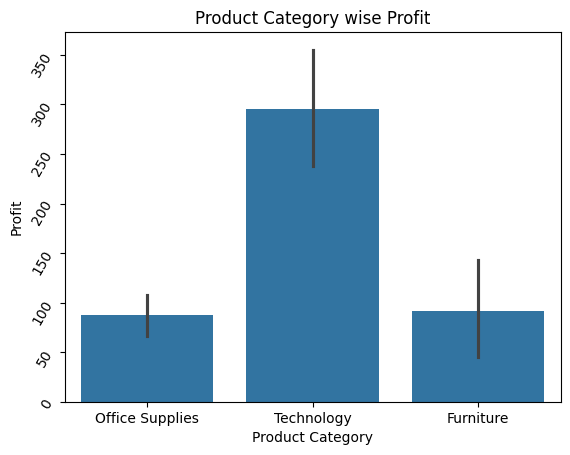

In [ ]:
sns.barplot(x="Product Category",y="Profit",data=df)
plt.title("Product Category wise Profit")
plt.yticks(rotation=60)
plt.show()

4.**prod category & prod base margin**

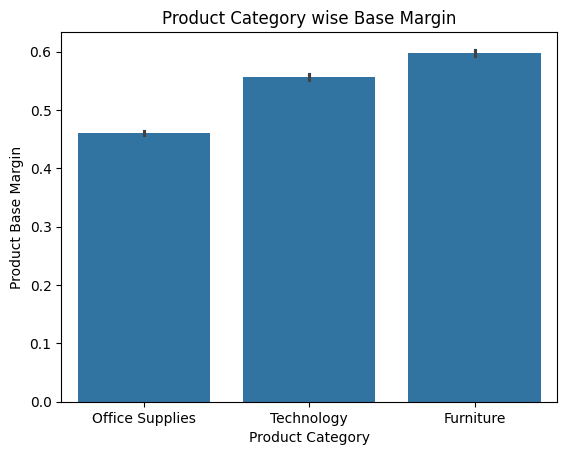

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

In [ ]:
sns.barplot(x="Product Category",y="Product Base Margin",data=df)
plt.title("Product Category wise Base Margin")
plt.show()
plt.figure(figsize=(6,4))
# sns.barplot(x="Profit",y="Product Base Margin",data=df)
# plt.show()

In [ ]:
df["State or Province"].value_counts()[:5]

,count
State or Province,
California,1021
Texas,646
Illinois,584
New York,574
Florida,522


In [ ]:
df["State or Province"].value_counts().index
# print(df["Least 5 selling states"])

Index(['California', 'Texas', 'Illinois', 'New York', 'Florida', 'Ohio',
       'Washington', 'Michigan', 'Pennsylvania', 'North Carolina', 'Indiana',
       'Minnesota', 'Massachusetts', 'Georgia', 'Virginia', 'Maryland',
       'Colorado', 'New Jersey', 'Wisconsin', 'Oregon', 'Tennessee',
       'Missouri', 'Iowa', 'Utah', 'Arizona', 'Kansas', 'Maine', 'Alabama',
       'Arkansas', 'Idaho', 'South Carolina', 'Oklahoma', 'Louisiana',
       'New Mexico', 'Kentucky', 'Connecticut', 'Mississippi', 'Nebraska',
       'District of Columbia', 'Vermont', 'New Hampshire', 'Montana',
       'West Virginia', 'Nevada', 'North Dakota', 'South Dakota', 'Wyoming',
       'Rhode Island', 'Delaware'],
      dtype='object', name='State or Province')

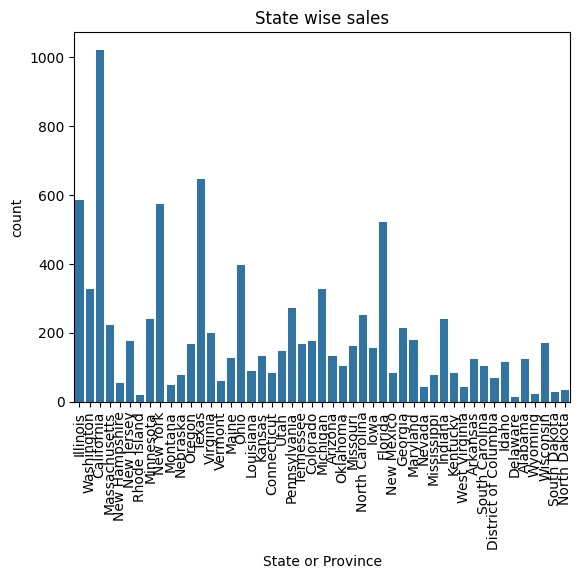

<Figure size 5000x700 with 0 Axes>

In [ ]:
plt.title("State wise sales")
plt.xticks(rotation=90)
sns.countplot(x="State or Province",data=df[df["State or Province"]])
plt.figure(figsize=(50,7))
plt.show()

**to segregate years from order date column**

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [ ]:
# df["Order Year"]=df["Order Date"].dt.year

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

**CUSTOMER SEGMENT ANALYSIS**

Customer Segment
Corporate         3375
Home Office       2316
Consumer          1894
Small Business    1841
Name: count, dtype: int64


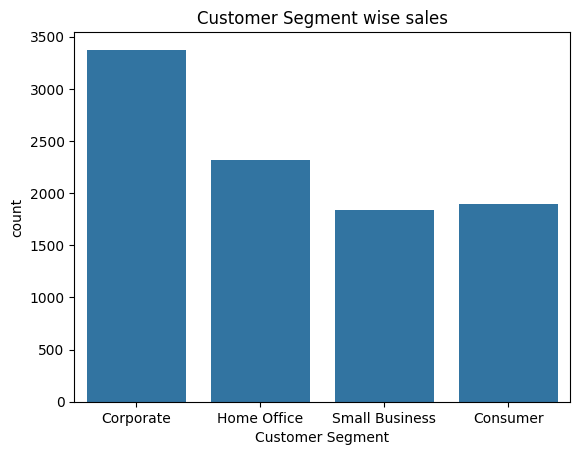

In [ ]:
print(df["Customer Segment"].value_counts())
sns.countplot(x="Customer Segment",data=df)
plt.title("Customer Segment wise sales")
plt.show()

**year wise sales Analysis**

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64


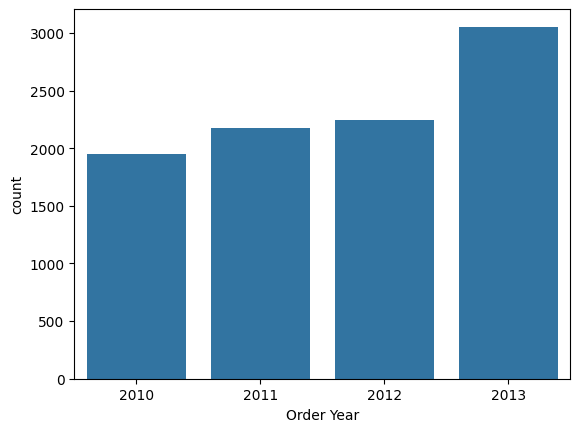

In [ ]:
print(df["Order Year"].value_counts())
sns.countplot(x="Order Year",data=df)
plt.show()